World Data 1990 - 2020

Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv('data/heart_failure.csv')

In [8]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Data Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Data Prepration

In [17]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [10]:
for col in df.columns:
    print(f'{col}, {len(df[col].unique())}')

age, 47
anaemia, 2
creatinine_phosphokinase, 208
diabetes, 2
ejection_fraction, 17
high_blood_pressure, 2
platelets, 176
serum_creatinine, 40
serum_sodium, 27
sex, 2
smoking, 2
time, 148
DEATH_EVENT, 2


In [11]:
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
con_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

Summary statistics

In [12]:
df[con_cols].describe().T[['min', '50%','max']].rename(columns={'50%':'avg'})

,min,avg,max
age,40.0,60.0,95.0
creatinine_phosphokinase,23.0,250.0,7861.0
ejection_fraction,14.0,38.0,80.0
platelets,25100.0,262000.0,850000.0
serum_creatinine,0.5,1.1,9.4
serum_sodium,113.0,137.0,148.0
time,4.0,115.0,285.0


 Exploratory Data Analysis

Count plot of categorical features

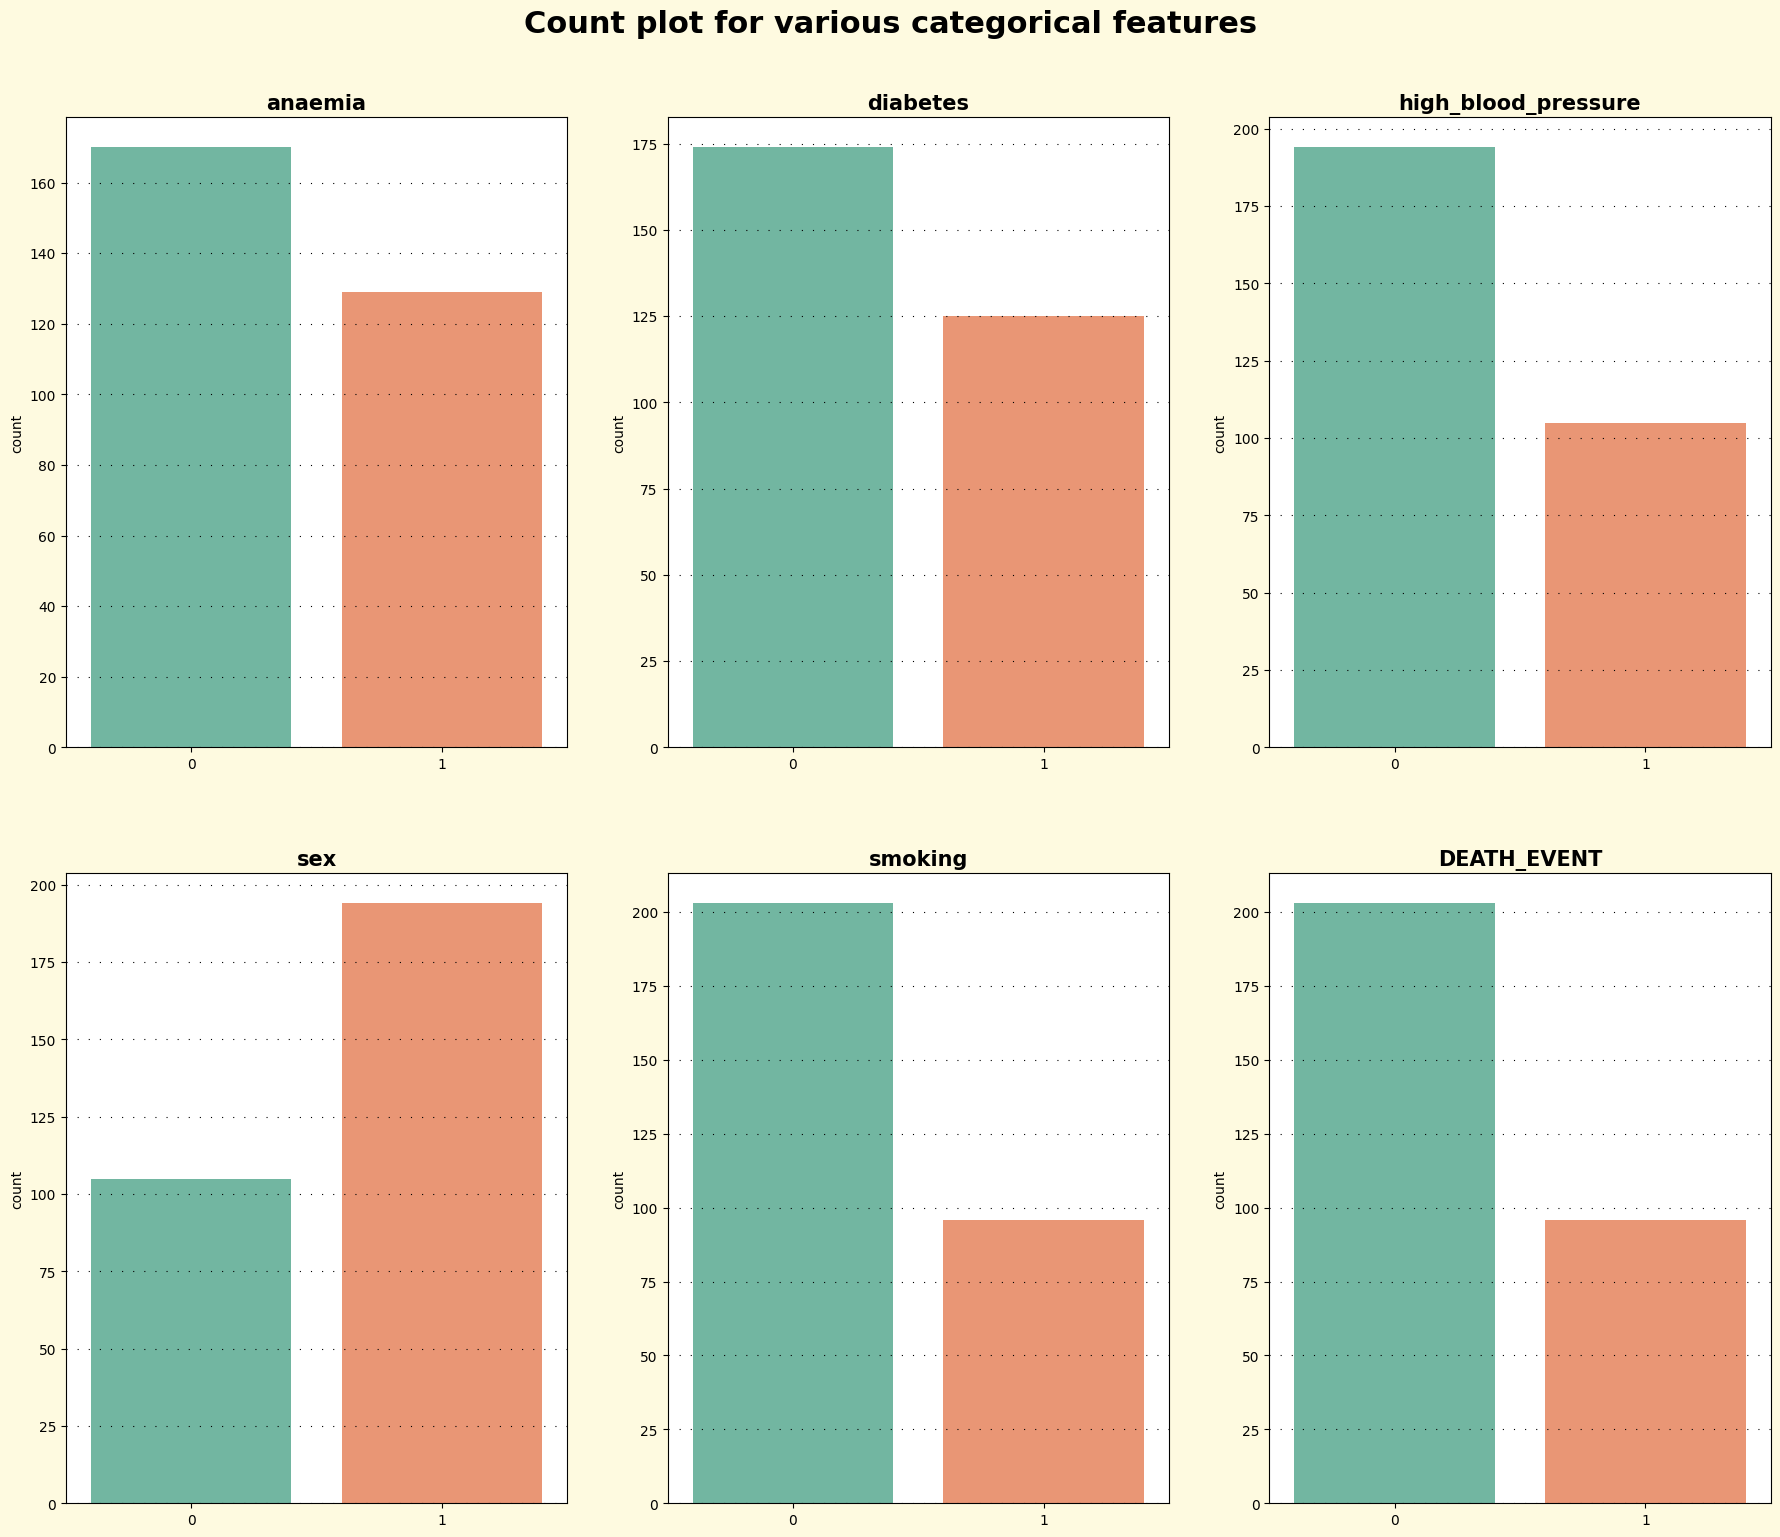

In [13]:
def plot_cate_feat(df, ax, col_name):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
    sns.countplot(ax=ax,data=df,x=col_name,palette = 'Set2')
    ax.set_xlabel("")

fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
axes = [ax1, ax2, ax3, ax4, ax5, ax6]


fig.suptitle(t='Count plot for various categorical features',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")

for ax,col_name in zip(axes,cat_cols):
    plot_cate_feat(df, ax, col_name)


plt.show()

Distribution of continuous features according to target variable

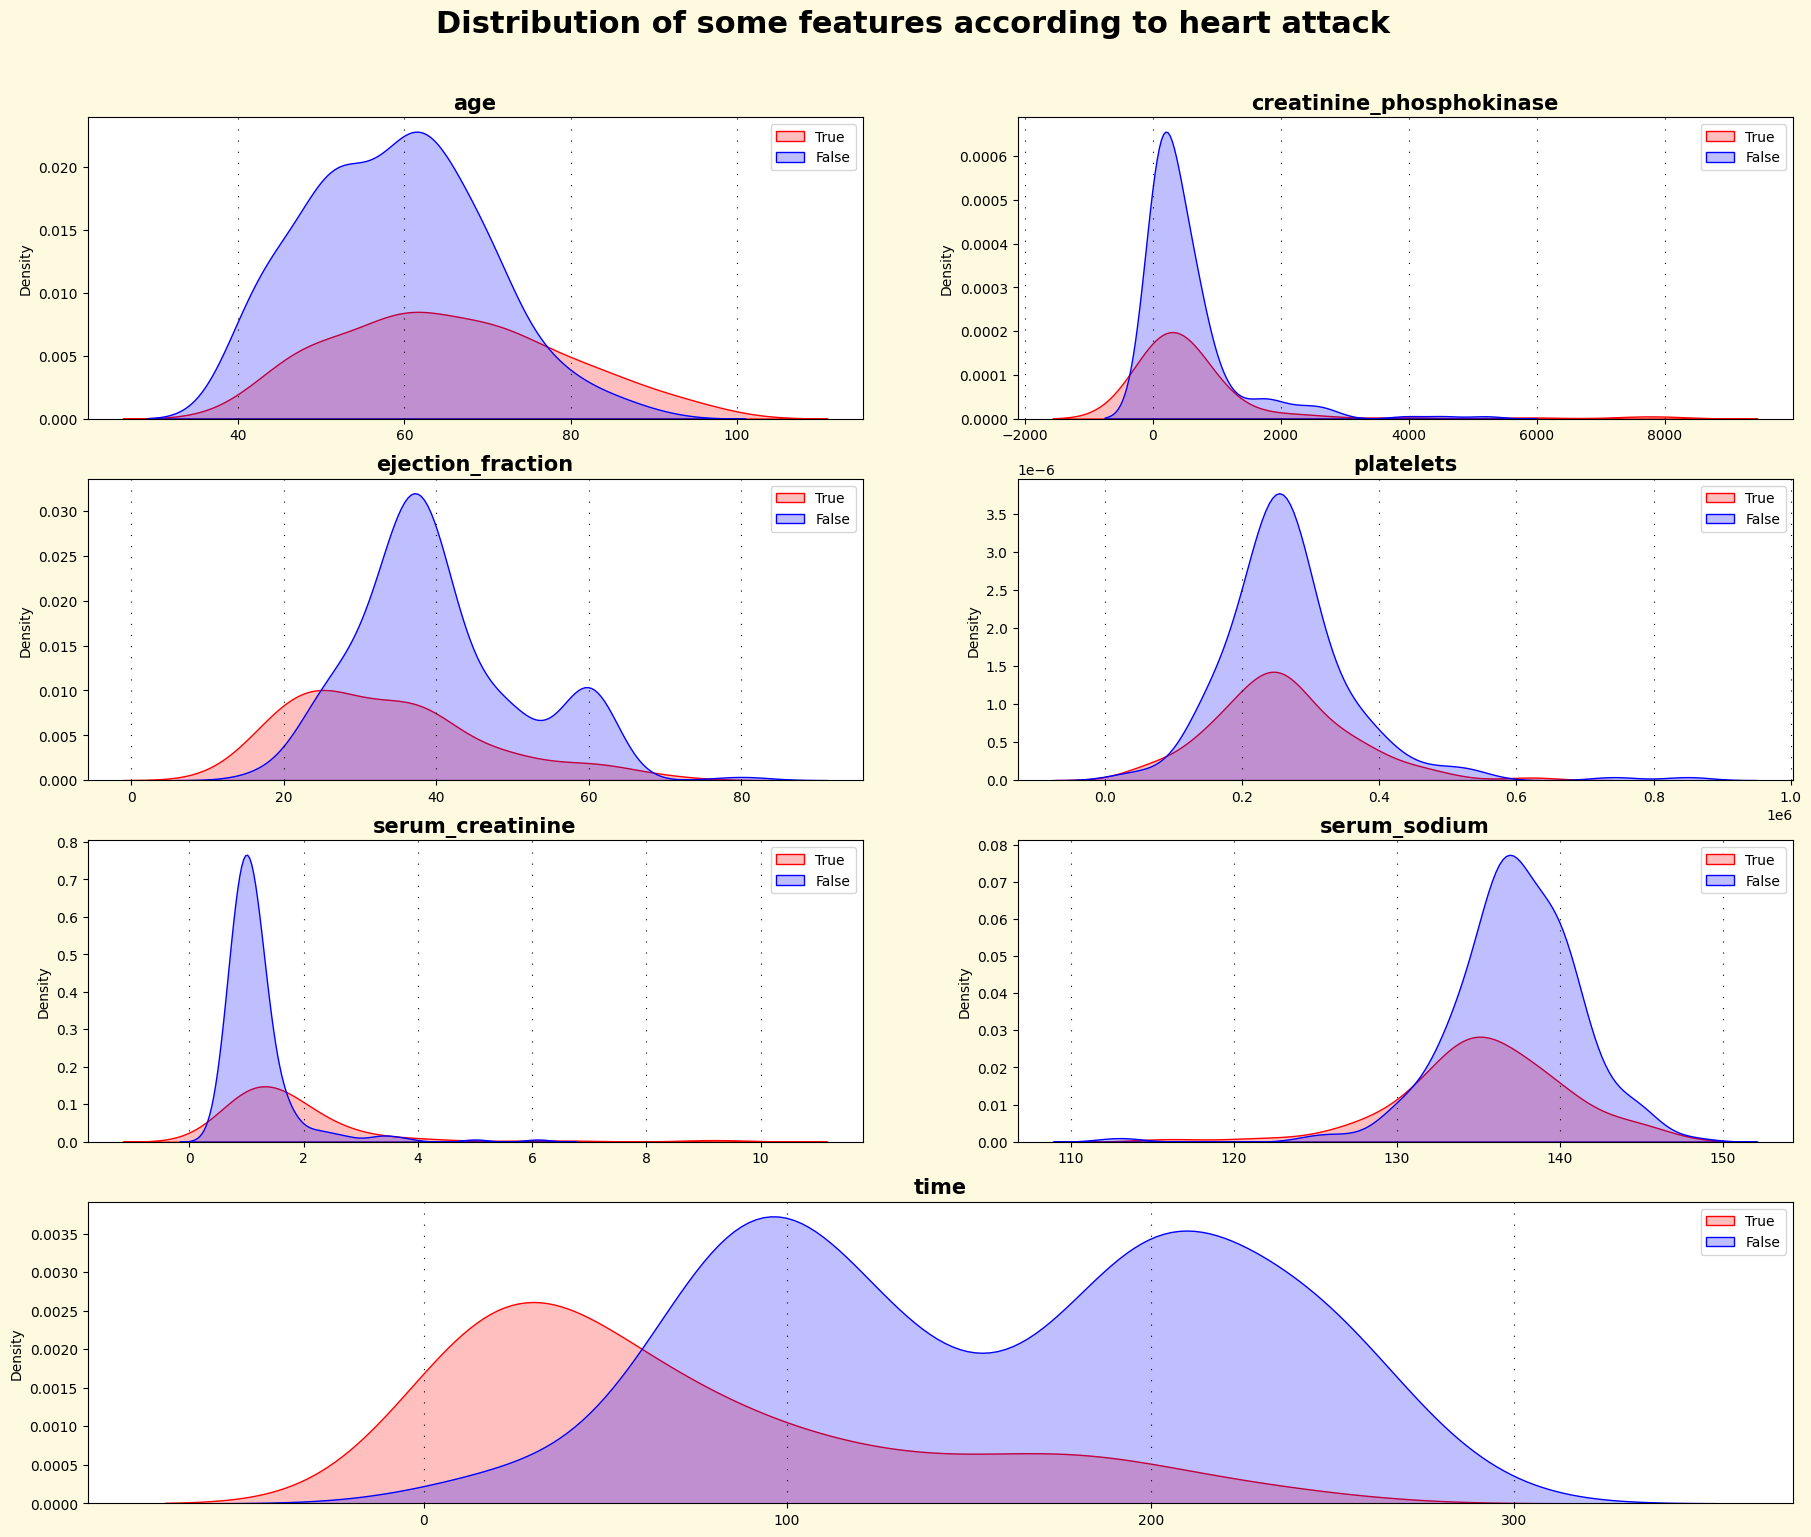

In [14]:
def plot_con_feat(df, ax, col_name, target='DEATH_EVENT'):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
    sns.kdeplot(ax=ax,data=df,x=col_name, hue=target, fill=True, palette = ['blue','red'])
    ax.legend([True, False])
    ax.set_xlabel("")

fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(4,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])
ax7 = fig.add_subplot(gs[3,:])
axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7]


fig.suptitle(t='Distribution of some features according to heart attack',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")

for ax,col_name in zip(axes,con_cols):
    plot_con_feat(df, ax, col_name)

plt.show()

Correlation between features and 'DEATH_EVENT'

In [15]:
df_corr = df.corr()
df_corr['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64